# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [5]:
df.columns = ['Production']

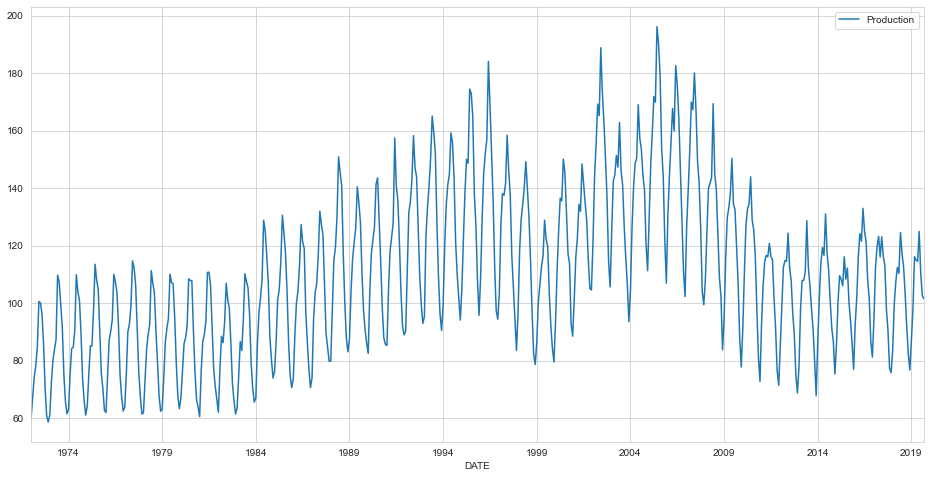

In [6]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [7]:
len(df)

573

In [8]:
test_size = 48

In [9]:
test_ind = len(df)- test_size
test_ind

525

In [10]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [11]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2015-05-01,106.058
2015-06-01,116.138
2015-07-01,108.378


In [12]:
test

,Production
DATE,
2015-10-01,93.932
2015-11-01,85.864
2015-12-01,76.975
2016-01-01,92.811
2016-02-01,101.974
2016-03-01,116.179
2016-04-01,124.211
2016-05-01,121.543
2016-06-01,132.987


### Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
# help(TimeseriesGenerator)

In [18]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [19]:
len(generator)

513

In [20]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [21]:
X, y = generator[0]

In [22]:
print(f'Given the Array: \n{X.flatten()}')
print('-----')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
-----
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [24]:
n_features = train_scaled.shape[1]
n_features

1

In [25]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(n_features))
model.compile(optimizer = 'adam', loss = 'mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [29]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [30]:
len(validation_generator)

36

In [31]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
513/513 [==============================] - 14s 15ms/step - loss: 0.0207 - val_loss: 0.0025
Epoch 2/20
513/513 [==============================] - 7s 14ms/step - loss: 0.0060 - val_loss: 0.0027
Epoch 3/20
513/513 [==============================] - 6s 11ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 4/20
513/513 [==============================] - 6s 12ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 5/20
513/513 [==============================] - 6s 11ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 6/20
513/513 [==============================] - 7s 14ms/step - loss: 0.0037 - val_loss: 0.0031


<AxesSubplot:>

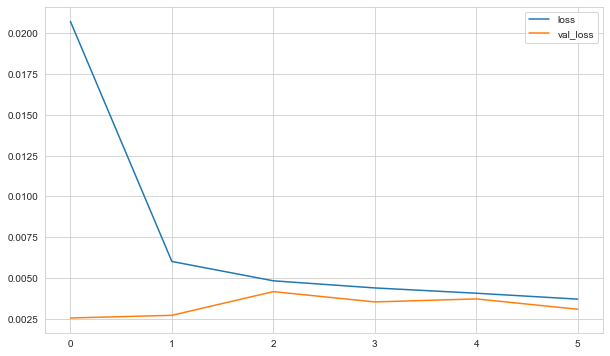

In [32]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [35]:
train_scaled[-length:]

array([[0.23707931],
       [0.20297948],
       [0.12155208],
       [0.19574094],
       [0.30468338],
       [0.37028329],
       [0.36143183],
       [0.34467716],
       [0.41797884],
       [0.36154745],
       [0.38938173],
       [0.30315844]])

In [36]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) ## current_pred değeri 2 boyutludur.
                                                # Bizim bunu(prediction_scaled)' i test datası ile karşılaştırabilmemiz için,
                                                # tek boyuta indirmemiz gerek.
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)
    
                                            ## Burada ise current_pred' i köşeli parantezle yazarak 2 boyuttan 3 boyuta çıkardım

In [37]:
predictions_scaled

[array([0.22623192], dtype=float32),
 array([0.19609587], dtype=float32),
 array([0.19267084], dtype=float32),
 array([0.21639962], dtype=float32),
 array([0.24912281], dtype=float32),
 array([0.28016472], dtype=float32),
 array([0.30348524], dtype=float32),
 array([0.3160435], dtype=float32),
 array([0.3140167], dtype=float32),
 array([0.2918212], dtype=float32),
 array([0.25897866], dtype=float32),
 array([0.21846937], dtype=float32)]

In [38]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.208055895812999 
mae: 0.11626875536780057 
mse: 0.018711813198743047 
rmse: 0.1367911298247918


#### Inverse Transformations and Comparing

In [39]:
predictions = scaler.inverse_transform(predictions_scaled)

In [40]:
compare = test[:12]

In [41]:
compare['Predictions'] = predictions

In [42]:
compare

,Production,Predictions
DATE,,
2015-10-01,93.932,89.770
2015-11-01,85.864,85.626
2015-12-01,76.975,85.155
2016-01-01,92.811,88.418
2016-02-01,101.974,92.918
2016-03-01,116.179,97.186
2016-04-01,124.211,100.393
2016-05-01,121.543,102.120
2016-06-01,132.987,101.841


<AxesSubplot:xlabel='DATE'>

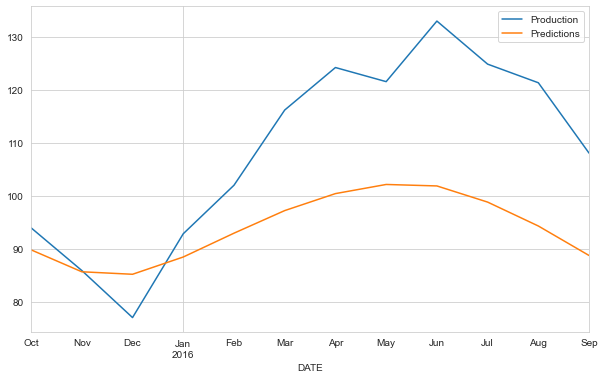

In [43]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [44]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: -0.2080558958130001 
mae: 15.988569998772201 
mse: 353.84174780999774 
rmse: 18.810681747613447


### with "relu" activation function

In [45]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
513/513 [==============================] - 10s 10ms/step - loss: 0.0265 - val_loss: 0.0068
Epoch 2/20
513/513 [==============================] - 5s 9ms/step - loss: 0.0114 - val_loss: 0.0044
Epoch 3/20
513/513 [==============================] - 5s 9ms/step - loss: 0.0087 - val_loss: 0.0035
Epoch 4/20
513/513 [==============================] - 5s 9ms/step - loss: 0.0070 - val_loss: 0.0025
Epoch 5/20
513/513 [==============================] - 5s 9ms/step - loss: 0.0070 - val_loss: 0.0021
Epoch 6/20
513/513 [==============================] - 5s 9ms/step - loss: 0.0061 - val_loss: 0.0043
Epoch 7/20
513/513 [==============================] - 5s 10ms/step - loss: 0.0059 - val_loss: 0.0022
Epoch 8/20
513/513 [==============================] - 5s 9ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 9/20
513/513 [==============================] - 5s 9ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 10/20
513/513 [==============================] - 5s 9ms/step - loss: 0.0050 - val_loss: 0.0

<AxesSubplot:>

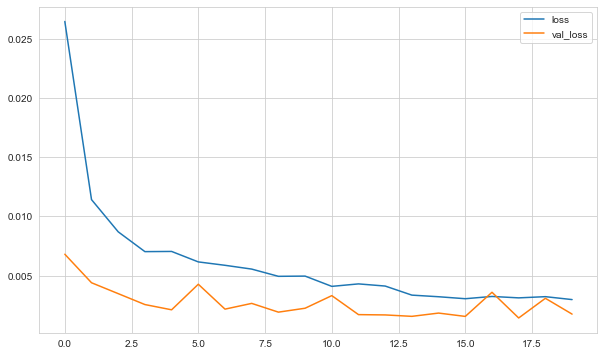

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [49]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
# CNN'de 3'ten 4'e çıkartıyor burda da 2'den 3'e çıkartıyor.
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch) # burdaki 2 boyutlu array çıkıyor ama biz bunu tek boyutlu array yapmamız lazım
    
    # store prediction
    predictions_scaled.append(current_pred[0]) # işte burada yukardaki 2 boyutluyu 3 boyutluya çıkarttık
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1) # burada da 2 boyutluyu 3'e çıkarttık

In [50]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.8092623539934276 
mae: 0.04459680444633849 
mse: 0.002954372570352847 
rmse: 0.05435414032392424


#### Inverse Transformations and Comparing

In [51]:
predictions = scaler.inverse_transform(predictions_scaled)

In [52]:
compare = test[:12]

In [53]:
compare['Predictions'] = predictions
compare

,Production,Predictions
DATE,,
2015-10-01,93.932,93.444
2015-11-01,85.864,86.234
2015-12-01,76.975,80.062
2016-01-01,92.811,87.750
2016-02-01,101.974,98.145
2016-03-01,116.179,106.123
2016-04-01,124.211,111.244
2016-05-01,121.543,115.772
2016-06-01,132.987,118.768


<AxesSubplot:xlabel='DATE'>

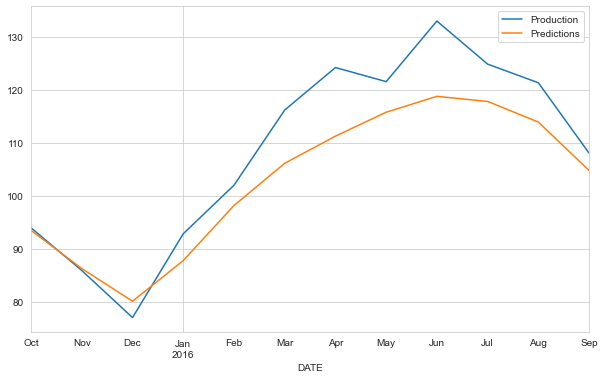

In [54]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [55]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.8092623539934273 
mae: 6.132680506953352 
mse: 55.867400068198116 
rmse: 7.474449817090092


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [56]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [57]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [58]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [59]:
model.fit_generator(generator, epochs=20)

Epoch 1/20
561/561 [==============================] - 9s 9ms/step - loss: 0.0283
Epoch 2/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0124
Epoch 3/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0071
Epoch 4/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0064
Epoch 5/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0056
Epoch 6/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0048
Epoch 7/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0045
Epoch 8/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0040
Epoch 9/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0038
Epoch 10/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0035
Epoch 11/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0032
Epoch 12/20
561/561 [==============================] - 5s 9ms/step - loss: 0.0034
Epoch 13/20
561/561 [====

In [60]:
scaled_full_data.shape

(573, 1)

In [61]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [62]:
forecast = scaler.inverse_transform(forecast)

In [63]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

In [64]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [65]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

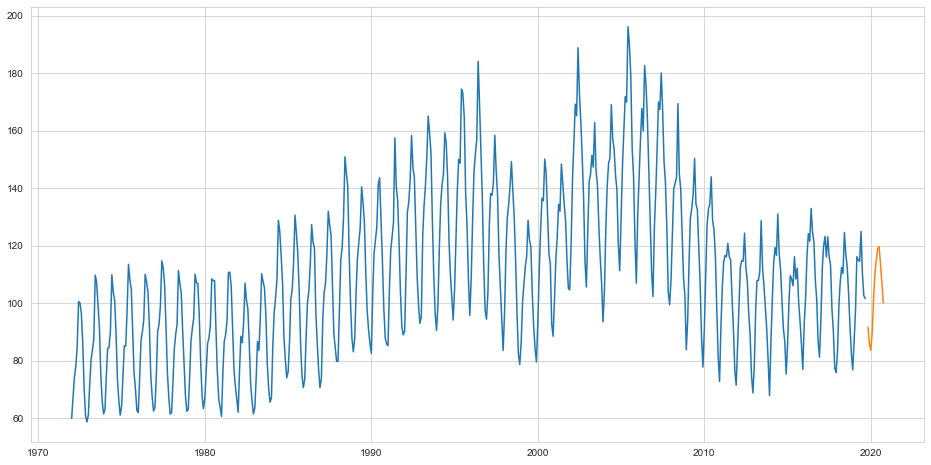

In [66]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

(576.0, 611.0)

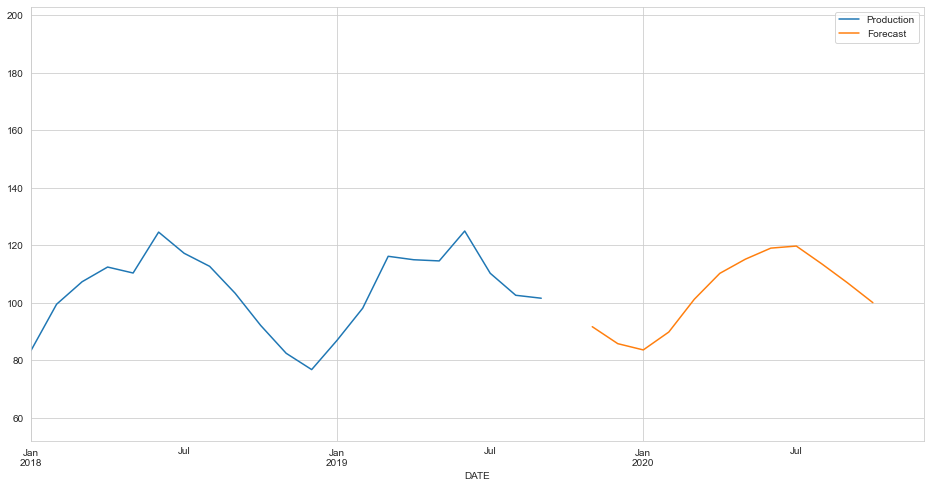

In [67]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')